# Kaggle Titanic Prediction Competition

## Intro

### Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Webpage: https://www.kaggle.com/c/titanic/data?select=test.csv

## Load data and libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
# load train data
train_df = pd.read_csv('train.csv')
print('Shape: ', train_df.shape)
train_df.head()

Shape:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# load test data
test_df = pd.read_csv('test.csv')
print('Shape: ', test_df.shape)
test_df.head()

Shape:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [4]:
# first view of dataset
train_df.info()
print('-'*30)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

In [5]:
train_df.describe() 
# test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Passenger_Id
Observation: PassengerId doesn't seem to have significant correlation with survival

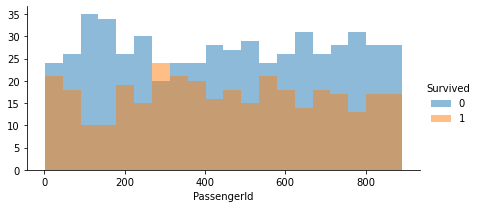

In [6]:
grid = sns.FacetGrid(train_df, hue='Survived', aspect=2)
grid.map(plt.hist, 'PassengerId', bins=20, alpha = 0.5)
grid.add_legend()

### Pclass
Observation: Survival rate reduces as Pclass increases. Survival rate esp low in Pclass 3.

In [7]:
train_df[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Sex
Observation: Women way more likely to survive

In [8]:
train_df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
#create Sex_code column in train and test set
train_df['Sex_bin'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex_bin'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Age
Observation: Age matters to survival. youngest and oldest most likely to survive. ~15-30 years old passengers more likely to die. 

/Users/alvinkan/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alvinkan/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


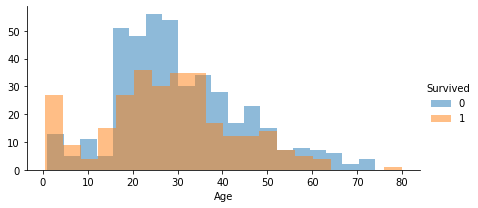

In [10]:
grid = sns.FacetGrid(train_df, hue='Survived', aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
# youngest and oldest more likely to survive. 15-30 more likely not to.

In [11]:
# fill nulls for Age
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1] 
    
    if pd.isnull(Age) :
        if Pclass==1 :
            return 38
        elif Pclass==2:
            return 29
        else :
            return 24
    else :
        return Age


def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1] 
    
    if pd.isnull(Age) :
        if Pclass==1 :
            return 42 
        elif Pclass==2:
            return 25
        else :
            return 22
    else :
        return Age
    
    
test_df['Age']=test_df[['Age','Pclass']].apply(Age_1,axis=1)
train_df['Age']=train_df[['Age','Pclass']].apply(Age_1,axis=1)

In [12]:
#create Age_bin column in train and test set
def age_bin(dataset):
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,16,30,40,50,80], 
                                labels=[0,1,2,3,4])
age_bin(train_df)
age_bin(test_df)

### Name/Title
Name is not useful hence title column is created

In [13]:
# create title feature
train_name = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_name = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
total_name = train_name.append(test_name)
total_name.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Lady          1
Dona          1
Mme           1
Sir           1
Jonkheer      1
Don           1
Countess      1
Capt          1
Name: Name, dtype: int64

In [14]:
#create title column in train and test set
def create_title(dataset):
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    for title in dataset['Title']:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

create_title(train_df)
create_title(test_df)
train_df[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [15]:
#create Title_bin
def title_bin(dataset):
    dataset['Title_bin'] = dataset['Title'].map( {'Master': 0, 'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Rare': 4} ).astype(int)

title_bin(train_df)
title_bin(test_df)

### Fare
Observation: Fare negatively correlates with Pclass but not to the extent to remove it. Lowest fare bin more likely to die.

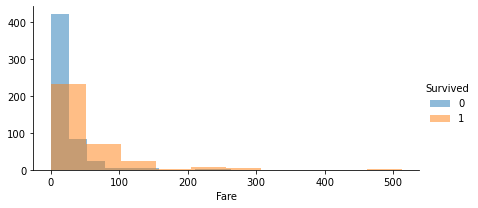

In [16]:
# fill null fares in test set based on Pclass
pclass_fare = test_df[['Pclass','Fare']].groupby('Pclass').median()
fare_dict = pclass_fare.to_dict()['Fare']
test_df['Fare'].fillna(fare_dict[test_df['Pclass'].iloc[0]], inplace=True)

# visualise survival rates
grid = sns.FacetGrid(train_df, hue='Survived', aspect=2)
grid.map(plt.hist, 'Fare', bins=10, alpha = 0.5)
grid.add_legend()

In [17]:
#create fare_bin column in train and test set
def fare_bin(dataset):
    dataset['Fare_bin'] = pd.qcut(dataset['Fare'], q=4, labels=[0,1,2,3])
fare_bin(train_df)
fare_bin(test_df)
train_df[['Fare_bin','Survived']].groupby('Fare_bin').count()

,Survived
Fare_bin,
0,223
1,224
2,222
3,222


In [18]:
#check correlation between fare and other columns
train_df.corr(method ='pearson') 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bin,Title_bin
PassengerId,1.000000,-0.005007,-0.035144,0.036496,-0.057527,-0.001652,0.012658,-0.042939,0.017598
Survived,-0.005007,1.000000,-0.338481,-0.037798,-0.035322,0.081629,0.257307,0.543351,0.398307
Pclass,-0.035144,-0.338481,1.000000,-0.436993,0.083081,0.018443,-0.549500,-0.131900,-0.246588
Age,0.036496,-0.037798,-0.436993,1.000000,-0.243914,-0.166945,0.138049,-0.074819,0.222765
SibSp,-0.057527,-0.035322,0.083081,-0.243914,1.000000,0.414838,0.159651,0.114631,-0.008921
Parch,-0.001652,0.081629,0.018443,-0.166945,0.414838,1.000000,0.216225,0.245489,0.128302
Fare,0.012658,0.257307,-0.549500,0.138049,0.159651,0.216225,1.000000,0.182333,0.146020
Sex_bin,-0.042939,0.543351,-0.131900,-0.074819,0.114631,0.245489,0.182333,1.000000,0.751016
Title_bin,0.017598,0.398307,-0.246588,0.222765,-0.008921,0.128302,0.146020,0.751016,1.000000


### Embarked
Observation: Those embarked from port C more likely to survive

In [19]:
# remove rows with null 'Embarked'
train_df = train_df[pd.notnull(train_df['Embarked'])]

train_df[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [20]:
#create Embarked_bin
def embarked_bin(dataset):
    dataset['Embarked_bin'] = dataset['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)

embarked_bin(train_df)
embarked_bin(test_df)

train_df[['Embarked_bin','Survived']].groupby('Embarked_bin').count()

<ipython-input-20-c1a5d6e4f0e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Embarked_bin'] = dataset['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)


,Survived
Embarked_bin,
0,168
1,77
2,644


### Family Size

In [21]:
# create familysize feature
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

<ipython-input-21-0a17978557fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1


### Family Survival

The belief is that if someone in the family survives, the whole family has a higher chance of survival

In [22]:
# create df_full to apply transformation to both train and test sets
full_df = train_df.append(test_df, sort=False)

# extract the last name from the 'Name' column (using the full_data)
for name in full_df['Name']:
    full_df['Last Name'] = full_df['Name'].str.extract('([A-Za-z]+)\,', expand=False)

# create family_survival column with default value
default_survival_value = 0.5
full_df['Family_survival'] = default_survival_value

# assign survival value based on identified families and known survivors in family
for grp, grp_df in full_df[['Survived','Name', 'Last Name', 'Fare', 'Ticket', 'PassengerId',
                       'SibSp', 'Parch', 'Age']].groupby(['Last Name', 'Fare', 'Ticket']):

    #if a family is found
    if (len(grp_df) > 1):
        for i, row in grp_df.iterrows():
            smax = grp_df.drop(i)['Survived'].max()
            smin = grp_df.drop(i)['Survived'].min()
            passID = row['PassengerId']

            #if at one person survived in the family
            if (smax == 1.0):
                full_df.loc[full_df['PassengerId'] == passID, 'Family_survival'] = 1
                
            #if no one survived in the family    
            elif (smin==0.0):
                full_df.loc[full_df['PassengerId'] == passID, 'Family_survival'] = 0

# see number of passengers with family survival info
print("Number of passengers with family survival information:", 
      full_df.loc[full_df['Family_survival']!=0.5].shape[0])

Number of passengers with family survival information: 369


In [23]:
# add family survival column to train and test set by splicing
train_df['Family_survival'] = full_df['Family_survival'][:len(train_df)]
test_df['Family_survival'] = full_df['Family_survival'][len(train_df):]

<ipython-input-23-f88ab419217a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Family_survival'] = full_df['Family_survival'][:len(train_df)]


### Cabin
Observation: too many null values to use

In [24]:
full_df[['Ticket', 'Cabin']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ticket  1307 non-null   object
 1   Cabin   293 non-null    object
dtypes: object(2)
memory usage: 30.6+ KB


In [25]:
# drop cabin column
test_df = test_df.drop(['Cabin'], axis=1)
train_df = train_df.drop(['Cabin'], axis=1)

In [26]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_bin,Age_bin,Title,Title_bin,Fare_bin,Embarked_bin,Family_size,Family_survival
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,2,Mr,1,0,1,1,0.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,3,Mrs,3,0,2,2,0.5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,4,Mr,1,1,1,1,0.5
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,Mr,1,1,2,1,0.5
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,1,Mrs,3,1,2,3,1.0


### Select features for model

In [27]:
selected = ['Family_survival','Family_size','Pclass','Sex_bin','Age_bin','Title_bin','Fare_bin','Embarked_bin']

## Feature Engineering

# Model Prediction

### Further split training set into train and test set for prediction

In [28]:
# split train_df further into subsets for training and testing
features = train_df[selected]
target = train_df["Survived"]
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((711, 8), (178, 8), (711,), (178,))

### Random Forest

In [29]:
# define classifier
model = RandomForestClassifier(criterion="gini", max_features=5,  
                               min_samples_split=8, n_estimators=400)

# fit classifier on train data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print accuracy scores
print(model.score(X_train, y_train))
print(accuracy_score(y_pred,y_test))
print(cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy').mean())

0.8888888888888888
0.8539325842696629
0.8368348982785602


### Logistic Regression

In [30]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(model.score(X_train, y_train))
print(accuracy_score(y_pred,y_test))
print(cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy').mean())

0.8888888888888888
0.7865168539325843
0.8410406885758999


### KNN

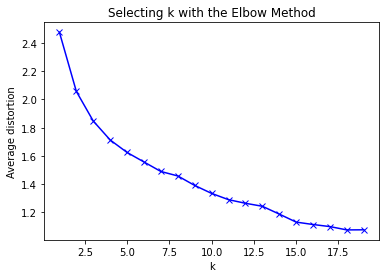

0.8396624472573839
0.8314606741573034
0.8157276995305164


In [31]:
# finding optimal k
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 

K = range(1, 20) 
meandistortions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X_train) 
    meandistortions.append(sum(np.min(cdist(X_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0]) 
plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show() 

# knn model
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(accuracy_score(y_pred,y_test))
print(cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy').mean())

### Actual prediction on given test set for submission

In [32]:
X_train = train_df[selected]
y_train = train_df['Survived']
X_test = test_df[selected]
X_train.shape,X_test.shape,y_train.shape

((889, 8), (418, 8), (889,))

In [36]:
model = RandomForestClassifier(n_estimators=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy').mean())

0.9111361079865017
0.8301966292134833


In [37]:
submission = pd.DataFrame({
        "PassengerId": test_df['PassengerId'],
        "Survived": y_pred
    })

In [38]:
submission.set_index('PassengerId').to_csv("submission.csv")